# NETFLIX DATA ANALYSIS

#### 1.What is the most frequent genre of movies released on Netflix?


#### 2.Which has highest votes in vote avg column?


#### 3.What movie got the highest popularity? what's its genre?


#### 4.What movie got the lowest popularity? what's its genre?


#### 5.Which year has the most filmmed movies?

### import libraries

In [112]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### load dataset

In [113]:
dataset = pd.read_csv("netflix.csv",lineterminator='\n')

In [114]:
dataset.head(2)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...


In [115]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [116]:
dataset['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [117]:
dataset.duplicated().sum()

np.int64(0)

In [118]:
dataset.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


#### Preprocessing/data cleaning

##### date-time

In [119]:
dataset['Release_Date'] = pd.to_datetime(dataset['Release_Date'])

In [120]:
dataset['Release_Date'].dtypes

dtype('<M8[ns]')

In [121]:
dataset['Release_Date'] = dataset['Release_Date'].dt.year
dataset['Release_Date'].dtypes

dtype('int32')

In [122]:
dataset.head(2)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...


##### remove column

In [123]:
col = ['Overview','Original_Language','Poster_Url']
dataset.drop(col,axis=1,inplace=True)

In [124]:
dataset.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [125]:
dataset.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"


##### categorize Vote_Average column

In [126]:
dataset.describe()

,Release_Date,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000,9827.000000
mean,2006.203623,40.326088,1392.805536,6.439534
std,15.685554,108.873998,2611.206907,1.129759
min,1902.000000,13.354000,0.000000,0.000000
25%,2000.000000,16.128500,146.000000,5.900000
50%,2011.000000,21.199000,444.000000,6.500000
75%,2017.000000,35.191500,1376.000000,7.100000
max,2024.000000,5083.954000,31077.000000,10.000000


In [127]:
def catigorize_col(df, col, labels):
    
    # setting the edges to cut the column accordingly
    edges = [
        df[col].describe()['min'],
        df[col].describe()['25%'],
        df[col].describe()['50%'],
        df[col].describe()['75%'],
        df[col].describe()['max']
    ]
    
    df[col] = pd.cut(df[col], edges, labels=labels, duplicates='drop')
    return df


In [128]:
# define labels for edges
labels = ['not_popular', 'below_avg', 'average', 'popular']

# categorize column based on labels and edges
catigorize_col(dataset, 'Vote_Average', labels)

# confirming changes
dataset['Vote_Average'].unique()


['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [129]:
dataset.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"


In [130]:
dataset['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [131]:
dataset.dropna(inplace=True)
dataset.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [132]:
dataset.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


##### split genre list 

In [133]:
#split the string 
dataset['Genre'] = dataset['Genre'].str.split(', ')
#explode the list 
dataset = dataset.explode('Genre').reset_index(drop=True)
dataset.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [135]:
dataset['Genre'] = dataset['Genre'].astype('category')
dataset['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [136]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [137]:
dataset.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

## VISUALIZATION

In [138]:
# setting seaborn configurations 
sns.set_style('whitegrid')

#### 1.What is the most frequent genre of movies released on Netflix?

In [140]:
dataset['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

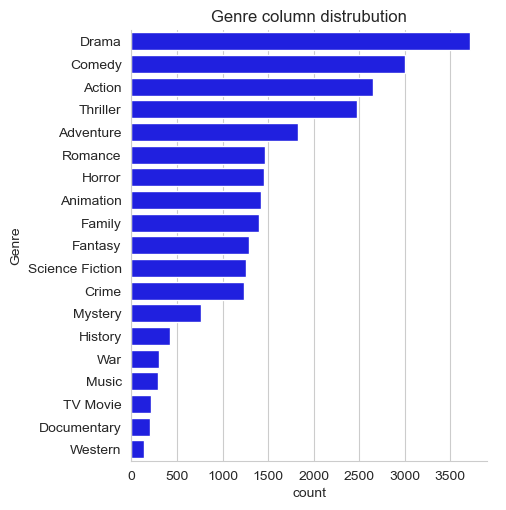

In [142]:
sns.catplot(y='Genre' , data=dataset ,kind='count',
              order=dataset['Genre'].value_counts().index,
              color='Blue')
plt.title('Genre column distrubution')
plt.show()

##### conclusion :- Drama  is the most frequent genre of movies released on Netflix

#### 2.Which has highest votes in vote avg column?

<Figure size 600x600 with 0 Axes>

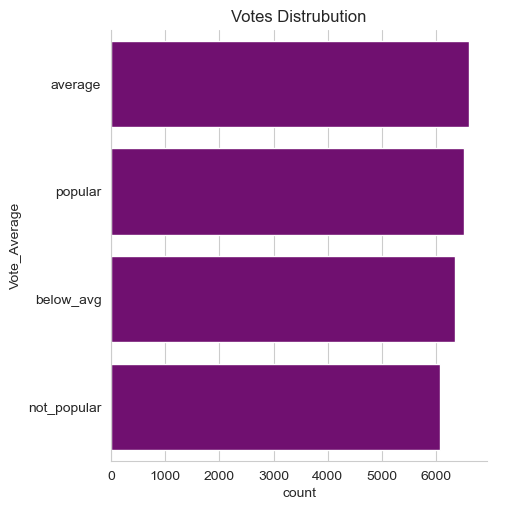

In [145]:
plt.figure(figsize=(6,6))
sns.catplot(y='Vote_Average', data=dataset, kind='count',
                order=dataset['Vote_Average'].value_counts().index,
                color='Purple')
plt.title('Votes Distrubution')
plt.show()

#### 3.What movie got the highest popularity? what's its genre?

In [146]:
dataset[dataset['Popularity'] == dataset['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


#### 4.What movie got the lowest popularity? what's its genre?

In [147]:
dataset[dataset['Popularity'] == dataset['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction


#### 5.Which year has the most filmmed movies?

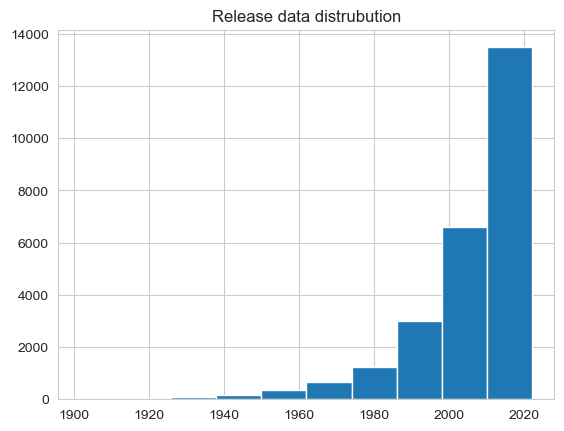

In [149]:
plt.hist(x='Release_Date',data=dataset)
plt.title('Release data distrubution')
plt.show()

### CONCLUSIONS

##### 1.What is the most frequent genre of movies released on Netflix?
-> Drama is the most frequent genre of movies released on Netflix

##### 2.Which has highest votes in vote avg column?
->we have 25% of our dataset with popular vote (6250 rows) . drama gets highest popularity 

##### 3.What movie got the highest popularity? what's its genre?
->Spider-Man:No way hoem has highest popularity with genre Action,Adventure,Science Fiction

##### 4.What movie got the lowest popularity? what's its genre?
->the united states and thread has the lowest popularity with genre Music,Drama,War,Sci-fi and history

##### 5.Which year has the most filmmed movies?
->year 2020